In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv("/workspace/DeepLearningFundamentals/Datasets/heart.csv")

In [21]:
df.describe()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,46.06500,2.360000,124.700000,83.380000,68.160000,168.075000,258.105000,2.915000,7.650000,2.315000,141.480000,84.820000,254.070000,167.375000,1.410000,0.320000
std,10.81274,1.017633,18.114654,11.000484,2.768161,26.639589,55.524126,1.069342,1.119718,1.197055,24.656833,12.808116,46.509686,27.516178,2.464196,0.467647
min,20.00000,1.000000,88.000000,38.000000,61.000000,109.000000,120.000000,1.000000,0.000000,1.000000,70.000000,56.000000,139.000000,108.000000,0.000000,0.000000
25%,38.00000,1.000000,110.000000,78.000000,66.000000,147.000000,220.000000,2.000000,8.000000,1.000000,125.000000,76.000000,222.750000,148.750000,0.000000,0.000000
50%,47.00000,2.000000,120.000000,80.000000,68.000000,165.000000,250.000000,3.000000,8.000000,2.000000,138.000000,83.000000,251.500000,165.500000,0.000000,0.000000
75%,54.00000,3.000000,130.000000,90.000000,70.000000,189.000000,295.000000,3.000000,8.000000,3.000000,155.000000,90.000000,283.250000,187.000000,2.000000,1.000000
max,69.00000,4.000000,210.000000,140.000000,75.000000,245.000000,535.000000,5.000000,8.000000,5.000000,230.000000,125.000000,368.000000,246.000000,9.000000,1.000000


In [28]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    return df[~((df<Lower_tail) | (df>Upper_tail)).any(axis=1)]
    # df2 = df[~df.isin("aykırıdeğerler")].dropna()
df_clean = iqr_outliers(df)

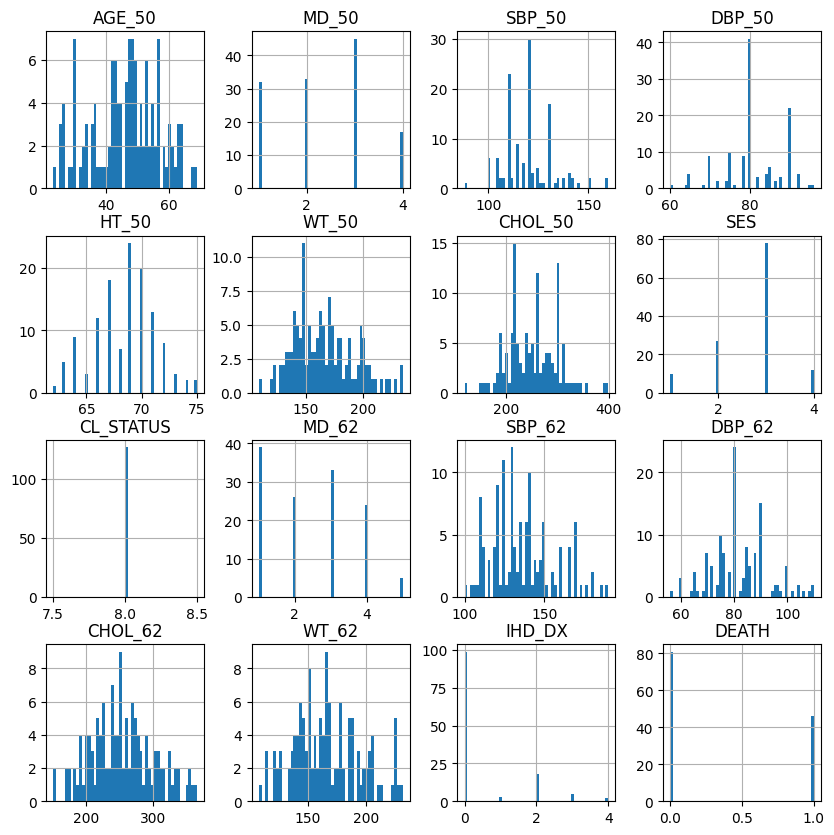

In [29]:
df_clean.hist(figsize=(10,10),bins=50);

In [31]:
df_clean.describe()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,45.913386,2.370079,119.677165,80.700787,68.456693,166.031496,251.669291,2.724409,8.0,2.448819,136.086614,82.157480,254.259843,166.039370,0.488189,0.362205
std,10.810066,1.006354,12.340334,7.339083,2.768175,26.316431,48.901270,0.741911,0.0,1.219606,19.353448,10.877693,47.513943,28.242263,0.982919,0.482541
min,23.000000,1.000000,88.000000,60.000000,62.000000,109.000000,120.000000,1.000000,8.0,1.000000,100.000000,56.000000,150.000000,108.000000,0.000000,0.000000
25%,38.500000,1.500000,110.000000,78.000000,67.000000,146.500000,220.000000,2.000000,8.0,1.000000,121.000000,75.000000,220.500000,145.500000,0.000000,0.000000
50%,47.000000,2.000000,120.000000,80.000000,69.000000,163.000000,250.000000,3.000000,8.0,2.000000,134.000000,80.000000,251.000000,163.000000,0.000000,0.000000
75%,53.500000,3.000000,129.000000,86.000000,70.000000,182.500000,290.000000,3.000000,8.0,3.000000,148.000000,90.000000,283.500000,186.000000,0.000000,1.000000
max,69.000000,4.000000,160.000000,96.000000,75.000000,235.000000,399.000000,4.000000,8.0,5.000000,190.000000,110.000000,367.000000,231.000000,4.000000,1.000000


<Axes: >

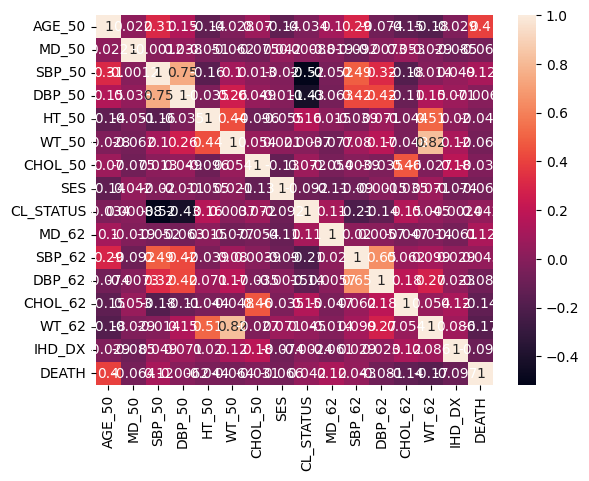

In [32]:
corr = df.corr()
import seaborn as sns
sns.heatmap(corr,annot=True)

In [33]:
y= df_clean["DEATH"].values
X= df_clean.drop("DEATH",axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [23]:
from sklearn.model_selection import KFold
kfold = KFold(5,shuffle=True)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled =  sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [38]:
from sklearn.model_selection import KFold
kfold = KFold(5,shuffle=True)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled,y_train)
y_preds = model.predict(X_test_scaled)
model.score(X_test_scaled,y_test)

0.5769230769230769

In [41]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
kfold = KFold(n_splits=5,shuffle=True)
model = KNeighborsClassifier()
cross_val_score(model,X_train_scaled,y_train,cv=kfold)

array([0.76190476, 0.65      , 0.7       , 0.5       , 0.6       ])

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [45]:
seed = 7
result = []
names = []
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('LSVC',LinearSVC()))
models.append(('RFC',RandomForestClassifier()))
models.append(('DTR',DecisionTreeRegressor()))
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVC', SVC()),
 ('LSVC', LinearSVC()),
 ('RFC', RandomForestClassifier()),
 ('DTR', DecisionTreeRegressor())]

In [47]:
import warnings
warnings.filterwarnings("ignore")
for name,model in models:
    kfold = KFold(n_splits=3,random_state=7,shuffle=True)
    cv_results = cross_val_score(model,X_train_scaled,y_train,cv=kfold,scoring="accuracy")
    result.append(cv_results)
    names.append(name)
    msg = f"{name} {cv_results.mean()} {cv_results.std()}"
    print(msg)

LR 0.7035056446821152 0.061388872193067504
KNN 0.6238859180035651 0.04883289672656944
NB 0.6729055258467023 0.04433094515310479
SVC 0.6737967914438503 0.037813196854895585
LSVC 0.6443850267379679 0.059827759168764386
RFC 0.7332144979203803 0.045505972872483674
DTR 0.5656565656565656 0.1335993620026477


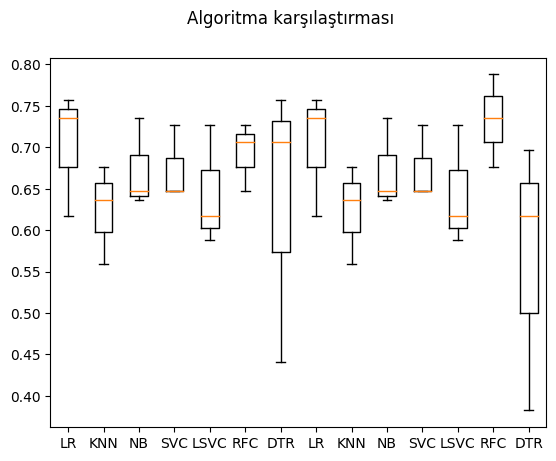

In [50]:
fig = plt.figure()
fig.suptitle("Algoritma karşılaştırması")
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'C':[1.0,10.0],
    'kernel':['linear','rbf','poly',],
    # 'shrinking':[True,False],
    'gamma':['auto',1,0.1],
    # 'coef0':[0.0,0.1,0.5]
}

model_svc = SVC()
grid_search = GridSearchCV(model_svc,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0], 'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [53]:
grid_search.best_score_

0.6923809523809524

In [54]:
grid_search.best_params_

{'C': 10.0, 'gamma': 'auto', 'kernel': 'linear'}

In [55]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'C':[1.0,10.0,50.0],
    'kernel':['linear','rbf','poly','sigmoid'],
    'shrinking':[True,False],
    'gamma':['auto',1,0.1],
    'coef0':[0.0,0.1,0.5]
}

model_svc = SVC()
rnd_search = RandomizedSearchCV(model_svc,param_grid,cv=5,scoring='accuracy')
rnd_search.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1.0, 10.0, 50.0],
                                        'coef0': [0.0, 0.1, 0.5],
                                        'gamma': ['auto', 1, 0.1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   scoring='accuracy')

In [56]:
rnd_search.best_params_

{'shrinking': True, 'kernel': 'sigmoid', 'gamma': 1, 'coef0': 0.0, 'C': 1.0}

In [57]:
rnd_search.best_score_

0.7023809523809523

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [59]:
model = SVC(shrinking=True, kernel= 'linear', gamma= 0.1, coef0= 0.1, C= 50.0)
model.fit(X_train_scaled,y_train)

SVC(C=50.0, coef0=0.1, gamma=0.1, kernel='linear')

In [61]:
y_preds =  model.predict(X_test_scaled)

<Axes: >

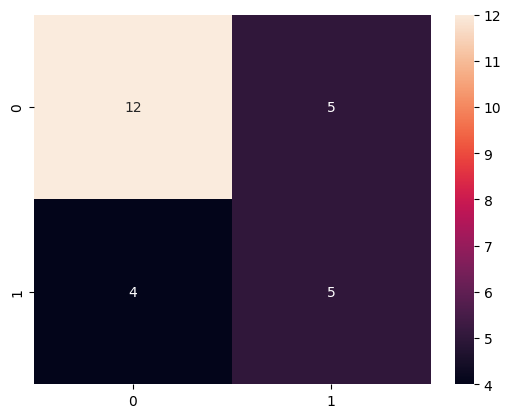

In [62]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.50      0.56      0.53         9

    accuracy                           0.65        26
   macro avg       0.62      0.63      0.63        26
weighted avg       0.66      0.65      0.66        26



In [66]:
accuracy_score(y_test,y_preds)
# ,recall_score,precision_score,f1_score

0.6538461538461539

In [68]:
X_train.shape

(101, 15)

In [70]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10,input_dim=8,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X_train_scaled,y_train,epochs=200,batch_size=5)



Epoch 1/200


ValueError: in user code:

    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_11" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 15)
